In [ ]:
import logging, sys
logging.disable(sys.maxsize)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
! pip install yellowbrick
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
import random
from sklearn.svm import SVC
random.seed(42)


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
X = pd.read_csv("x_train.csv")
y = pd.read_csv("y_train.csv")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
classes = y_train.value_counts().index.tolist()

In [ ]:
X = pd.read_csv("x_train.csv")
y = pd.read_csv("y_train.csv")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


def EvaluateModel(model, encode_y = False):
    
    if(encode_y):
        OE = OrdinalEncoder()
        y_train_encoded = OE.fit_transform(y_train)
        y_valid_encoded = OE.fit_transform(y_valid)
        predictor = model.fit(X_train, y_train_encoded) 
        y_valid_pred = predictor.predict(X_valid)
        y_train_pred = predictor.predict(X_train)
        classes_xgb=["0","1","2","3","4","5","6","7"]
        print("................ Classifcation Report for VALID data ................")
        print(classification_report(y_valid_encoded, y_valid_pred, target_names=classes_xgb))
        print("................ Classifcation Report for TRAIN data ................")
        print(classification_report(y_train_encoded, y_train_pred, target_names=classes_xgb))
        print("................      WEIGHTED F1-SCORE of 5-CV      ................")
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        visualizer = CVScores(model, cv=cv, scoring = "f1_weighted")
        visualizer.fit(X_train, y_train_encoded)
        visualizer.show() 
    else:
        predictor = model.fit(X_train, y_train) 
        y_valid_pred = predictor.predict(X_valid)
        y_train_pred = predictor.predict(X_train)
        classes = ['Benign', 'Spoofing', 'BruteForce', 'Web', 'Recon', 'DDoS', 'Mirai', 'DoS']

        print("................ Classifcation Report for VALID data ................")
        print(classification_report(y_valid, y_valid_pred, target_names=classes))

        print("................ Classifcation Report for TRAIN data ................")
        print(classification_report(y_train, y_train_pred, target_names=classes))

        print("................      WEIGHTED F1-SCORE of 5-CV      ................")
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        visualizer = CVScores(model, cv=cv, scoring = "f1_weighted")
        visualizer.fit(X_train, y_train)
        visualizer.show() 


### Linear SVM Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

      Benign       0.52      0.81      0.63       157
    Spoofing       0.34      0.16      0.21       148
  BruteForce       0.51      0.80      0.62       112
         Web       0.67      0.35      0.46       131
       Recon       0.96      0.99      0.97       130
        DDoS       0.41      0.44      0.42       147
       Mirai       0.58      0.67      0.62       140
         DoS       0.32      0.21      0.26       131

    accuracy                           0.55      1096
   macro avg       0.54      0.55      0.53      1096
weighted avg       0.53      0.55      0.52      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

      Benign       0.53      0.85      0.65       611
    Spoofing       0.43      0.21      0.28       585
  BruteForce       0.61      0.85      0.71   

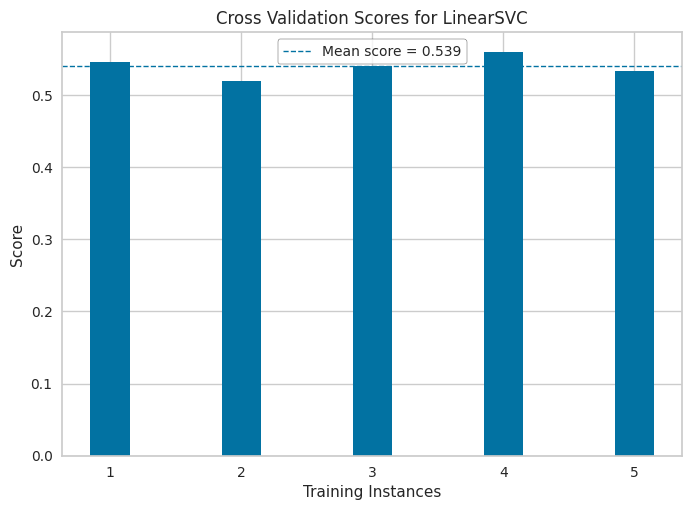

In [ ]:
model = LinearSVC(loss = "hinge", multi_class = "crammer_singer", penalty = "l1", random_state=0, tol=1e-5, C=1)
EvaluateModel(model)

### Kernel SVM Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

      Benign       0.59      0.61      0.60       157
    Spoofing       0.40      0.45      0.43       148
  BruteForce       0.67      0.71      0.69       112
         Web       0.74      0.69      0.71       131
       Recon       1.00      0.99      1.00       130
        DDoS       0.54      0.46      0.50       147
       Mirai       0.74      0.61      0.67       140
         DoS       0.49      0.58      0.53       131

    accuracy                           0.63      1096
   macro avg       0.65      0.64      0.64      1096
weighted avg       0.64      0.63      0.63      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

      Benign       0.77      0.80      0.78       611
    Spoofing       0.51      0.65      0.58       585
  BruteForce       0.73      0.77      0.75   

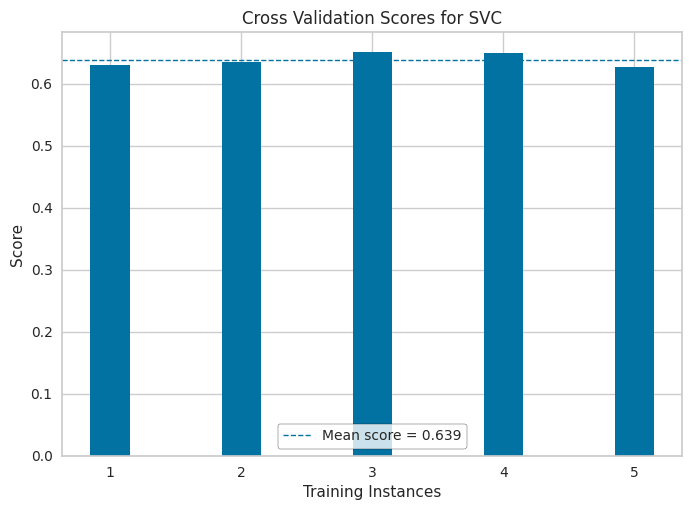

In [ ]:
model_SVC = SVC(C= 100, degree = 1, gamma='scale', kernel = 'rbf', max_iter = 20000)
EvaluateModel(model_SVC)

### KNN  Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

      Benign       0.52      0.59      0.55       157
    Spoofing       0.39      0.52      0.45       148
  BruteForce       0.90      0.80      0.85       112
         Web       0.84      0.92      0.88       131
       Recon       1.00      1.00      1.00       130
        DDoS       0.56      0.44      0.49       147
       Mirai       0.70      0.39      0.50       140
         DoS       0.45      0.54      0.49       131

    accuracy                           0.64      1096
   macro avg       0.67      0.65      0.65      1096
weighted avg       0.66      0.64      0.64      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       611
    Spoofing       1.00      1.00      1.00       585
  BruteForce       1.00      1.00      1.00   

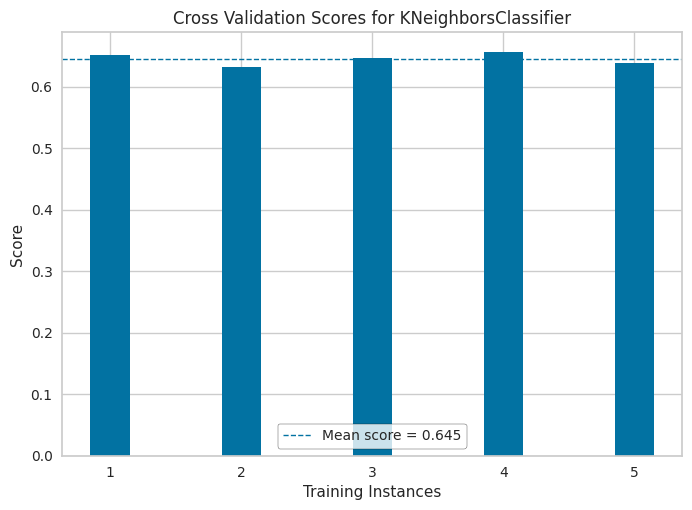

In [ ]:
model = KNeighborsClassifier(n_neighbors = 31, weights = 'distance')
EvaluateModel(model)

### Decision Tree Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

      Benign       0.74      0.82      0.78       157
    Spoofing       0.58      0.84      0.69       148
  BruteForce       0.99      1.00      1.00       112
         Web       1.00      1.00      1.00       131
       Recon       1.00      0.99      1.00       130
        DDoS       0.96      0.68      0.80       147
       Mirai       0.82      0.78      0.80       140
         DoS       0.85      0.62      0.72       131

    accuracy                           0.84      1096
   macro avg       0.87      0.84      0.85      1096
weighted avg       0.86      0.84      0.84      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

      Benign       0.84      0.87      0.85       611
    Spoofing       0.56      0.90      0.69       585
  BruteForce       1.00      1.00      1.00   

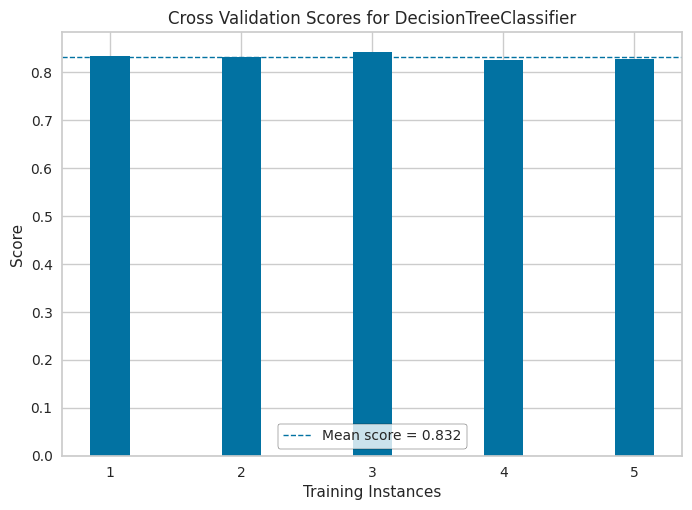

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split =  10, splitter =  'best')
EvaluateModel(model)

### XGBoost Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       159
           1       0.72      0.78      0.75       152
           2       1.00      1.00      1.00       121
           3       1.00      0.99      1.00       115
           4       1.00      0.99      1.00       119
           5       0.77      0.71      0.74       129
           6       0.85      0.77      0.81       164
           7       0.68      0.70      0.69       137

    accuracy                           0.84      1096
   macro avg       0.85      0.85      0.85      1096
weighted avg       0.84      0.84      0.84      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       609
           1       0.91      0.95      0.93       581
           2       1.00      1.00      1.00   

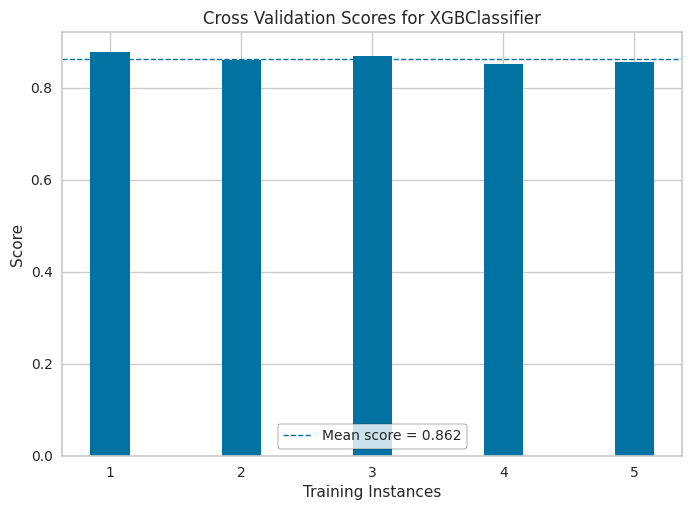

In [ ]:
model = XGBClassifier(colsample_bytree = 0.8, reg_alpha = 5, reg_lambda= 5, seed=0)
EvaluateModel(model, True)

### Random Forest Evaluation

................ Classifcation Report for VALID data ................
              precision    recall  f1-score   support

      Benign       0.77      0.83      0.80       157
    Spoofing       0.74      0.80      0.77       148
  BruteForce       1.00      0.99      1.00       112
         Web       1.00      1.00      1.00       131
       Recon       1.00      0.99      1.00       130
        DDoS       0.86      0.69      0.77       147
       Mirai       0.80      0.82      0.81       140
         DoS       0.70      0.72      0.71       131

    accuracy                           0.85      1096
   macro avg       0.86      0.86      0.86      1096
weighted avg       0.85      0.85      0.85      1096

................ Classifcation Report for TRAIN data ................
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       611
    Spoofing       1.00      1.00      1.00       585
  BruteForce       1.00      1.00      1.00   

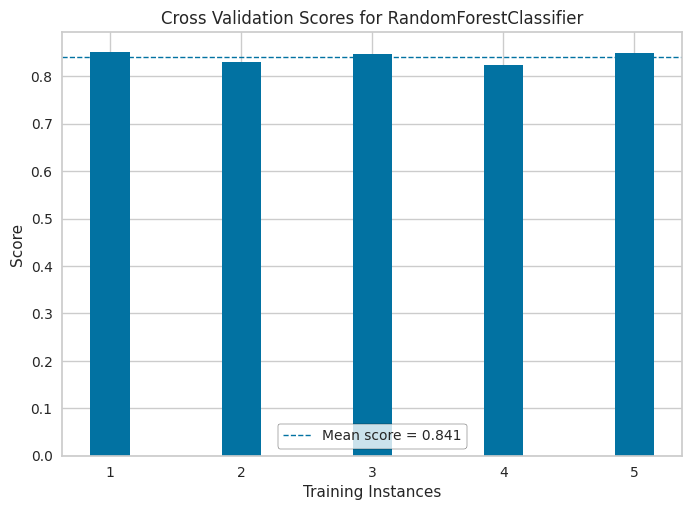

In [ ]:
model = RandomForestClassifier(max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1000)
EvaluateModel(model)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>